<a href="https://colab.research.google.com/github/Swastik02aug/Mobile-price-range-prediction/blob/main/Mobile_Price_Range_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Pridiction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -**          -Swastik Chaurasia


# **Project Summary -**

Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.we looked at classification. Classifiers represent the intersection of advanced machine theory and practical application. These algorithms are more than just a sorting mechanism for organising unlabeled data instances into distinct groupings. Classifiers include a unique set of dynamic rules that include an interpretation mechanism for dealing with ambiguous or unknown values, all of which are suited to the kind of inputs being analysed. Most classifiers also utilise probability estimates, which enable end-users to adjust data categorization using utility functions.And these classifiers methods helps us to predict the price range for mobile.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices .The objective is to find out some relation between features of a mobile phone (eg:-RAM,INTERNAL MEMORY ,etc) and its selling price .In this problem ,we do not have to predict the actual price but a price range indicating how  high  the price is.**


Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np                                          #importing for Numerical computations
import pandas as pd                                         #importing Data manipulations
import matplotlib.pyplot as plt                             #importing for visualize with plots
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier         #importing random forest classifier
from sklearn.neighbors import KNeighborsClassifier          #Import KNeighbors Classifier
from sklearn.tree import DecisionTreeClassifier             #importing decision tree classifier
from sklearn.pipeline import make_pipeline                  #importing make_pipeline for constructing pipelines
from sklearn.preprocessing import StandardScaler            #importing  for Scaling data
from sklearn.ensemble import StackingClassifier             #importing Stacking Classifier
from sklearn.impute import SimpleImputer                    #importing for treating  missing values
from sklearn.model_selection import cross_val_score         #importing  for cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV            #importing to find the best values for hyperparameters of a model
from sklearn.model_selection import train_test_split        # split train and test data

import warnings
warnings.filterwarnings("ignore")                           #importing disable some warnings

### Dataset Loading

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# loading csv file
df=pd.read_csv('/content/drive/MyDrive/classification ml project/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()
#Return the first 5 rows of the DataFrame

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape
#return the (number of rows,number of columns)

There are 2000 rows and 21 columns in the given data sets.

### Dataset Information

In [ ]:
# Dataset Info
df.info()
#it is used to provides details about each columns .

From the above we find that there no null values present in the given data set and only two types of data are present i.e;integers and float.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value 
df.duplicated()
# it is uesd to return the boolean output such as True for duplicated values otherwise False


In [ ]:
# here we fining out the lenght of the duplicate values 
len(df[df.duplicated()])

Hence there is no duplicate values present in the given data set.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()
#it is used to return the number of sum of all missing values in the columns of the given data set.

There is no null values  found in any columns of the given data sets.


### What did you know about your dataset?

From the given data set we find that there is no duplicated as well as no missing values present in the given data set .And there are only two types of data set are present i.e; integers and float.There are 2000 rows and 21 columns in the dataframe.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
c=list(df.columns)


In [ ]:
# Dataset Describe
df.describe(include='all').T
#.T is used to transepose the data frame
# it is used to provides the no. of element present in every columns,mean,standard deviation,minimum,maximum  and etc 

From the above we find that minimum value of px_height and sc_w cannot be zero ,which can't be so we need to handle that .

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()
# it is used to print the number of unique values in each columns of the data set.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df.head()

In [ ]:
binary_features = ['blue', 'four_g', 'three_g','dual_sim','touch_screen','wifi']
normal_feature=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','talk_time','price_range' ]  

### What all manipulations have you done and insights you found?

Here we differenciating the boolean data and normal data ,it will help out to analysis the data more accurately.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
#classes
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

So, there are mobile phones in 4 price ranges. The number of elements is almost similar.

In [ ]:
c=df[normal_feature]

##### 1. Why did you pick the specific chart?

distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

##### 2. What is/are the insight(s) found from the chart?

from the given data we find that data distibution is not normal .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To make it normal distribution we aplly log transformation

#### Chart - 2

In [ ]:
#Let us analyse some data features and see their distribution.
c=df[normal_feature]
for a in c:
  sns.set(rc={'figure.figsize':(5,5)})
  ax=sns.displot(data=df[a])
  plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

So, we can see that half the devices have Bluetooth, and half don’t.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# check for existence of corelation
plt.figure(figsize=(20,10))
plt.title('Correlation Heatmap')
cor=df.corr()
sns.heatmap(abs(cor), annot = True, cmap='YlGnBu')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap we find that ram and price range are highly  corelated ,pc and tc are also highly correlated ,and 4g and 3g are also highly co related with each other.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
#checking for outliers

plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we find that there is no out liers are present in the given data sets.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'green')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Here we find out that price distribution with and without binary data sets.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Plot of binary features against price range
c=df[normal_feature]
for col in normal_feature:
  fig, axs = plt.subplots(1,2, figsize=(15,5))
  sns.kdeplot(data=df, x=col, hue='price_range', ax=axs[0])
  sns.boxplot(data=df, x='price_range', y=col, ax=axs[1])
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Here we finding out the price distribution with respect to the normal data sets.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

In [ ]:
# parameter for Support Vector Classifier
svc_params = {'C':range(5,10,2),
              'kernel':['rbf','linear', 'poly', 'sigmoid',]}
# After finding the best parameters, we commented on all the other parameters for faster execution

In [ ]:
svc_grid = GridSearchCV(SVC(),param_grid=svc_params,cv=5,verbose=True,scoring='accuracy',n_jobs=-1)
svc_grid.fit(X_train,y_train)

In [ ]:
svc_grid.best_params_

In [ ]:
ML(SVC(C= 5, kernel= 'linear'))

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#finding out no. of px_height and sc_w which cannot be zero
a=len(df[df.px_height==0])
b=len(df[df.sc_w==0])
print('no. pixel height equal to zero:',a)
print('no. screen width equal to zero:',b)

#assigning the new value (mean value) to the zero.
mean1=df.px_height.mean()
mean2=df.sc_w.mean()
df['sc_w'][df[df.sc_w == 0].index] = mean1
df['px_height'][df[df.px_height == 0].index] = mean2

#### What all missing value imputation techniques have you used and why did you use those techniques?

From the above we find that minimum value of px_height(pixel height ) and sc_w(screen width) cannot be zero ,which can't be so we need to handle that . so we have to remove those zeroes with mean .

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#Hence there is no outliers are present in the given data set.



##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
#no need

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
#no need.

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

In [ ]:
df.head(10)

### 4. Feature Manipulation & Selection

In [ ]:
# no need

#### 1. Feature Manipulation

In [ ]:
df.columns

In [ ]:
from matplotlib.axes import BarContainer
# Manipulate Features to minimize feature correlation and create new features
#screen size is equal to the diagonal of the screen in inches
#1 cm =.393 inches
#diagonal=sqrt((df.sc_h*.393)^2+(df.sc_w*.393)^2)
#df['screen_size']=(df.sc_h*df.sc_w)
#df.head()
import math as m
sc_h_i=.393*df.sc_h
sc_w_i=.393*df.sc_w
a=sc_h_i**2
b=sc_w_i**2
c=a+b

df['screen_size']=(np.sqrt(c))
df.drop(df.sc_h, axis=0,inplace=True)
df.drop(df.sc_w, axis=1,inplace=True)




In [ ]:
df.head()

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [ ]:
# no need

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
#no need

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

In [ ]:
# there are some variale which do play major role in pridecting the price of the mobile (blue,dual_sim,m_dep).
df.columns

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
df.columns

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# choose appropriate dependent and independent variables
y = df.dropna().price_range
X = df.dropna().drop(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'screen_size'], axis=1)

# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [ ]:
# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

In [ ]:
#no need

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

# **KNN:**

In [ ]:
# Let's create numpy arrays for features and target
X = df.drop('price_range',axis=1).values
y = df['price_range'].values

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

In [ ]:
knn.score(X_test,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

In [ ]:
# Get the model coefficients
clf.coef_

In [ ]:
clf.intercept_

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
X_test

In [ ]:
test_preds

In [ ]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [ ]:
test_preds

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
train_class_preds

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

In [ ]:
#Implementing Cross-validated Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
logistic = LogisticRegression()

In [ ]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

In [ ]:
scores['train_accuracy']

In [ ]:
scores['test_accuracy']

In [ ]:
scores['estimator']

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

A random forest is a supervised machine learning method built from decision tree techniques. This algorithm is used to anticipate behaviour and results in a variety of sectors, including banking and e-commerce.

A random forest is a machine learning approach for solving regression and classification issues. It makes use of ensemble learning, which is a technique that combines multiple classifiers to solve complicated problems.

A random forest method is made up of a large number of decision trees. The random forest algorithm’s ‘forest’ is trained via bagging or bootstrap aggregation. Bagging is a meta-algorithm ensemble that increases the accuracy of machine learning algorithms.

The outcome is determined by the (random forest) algorithm based on the predictions of the decision trees. It forecasts by averaging or averaging the output of several trees. The precision of the outcome improves as the number of trees grows.
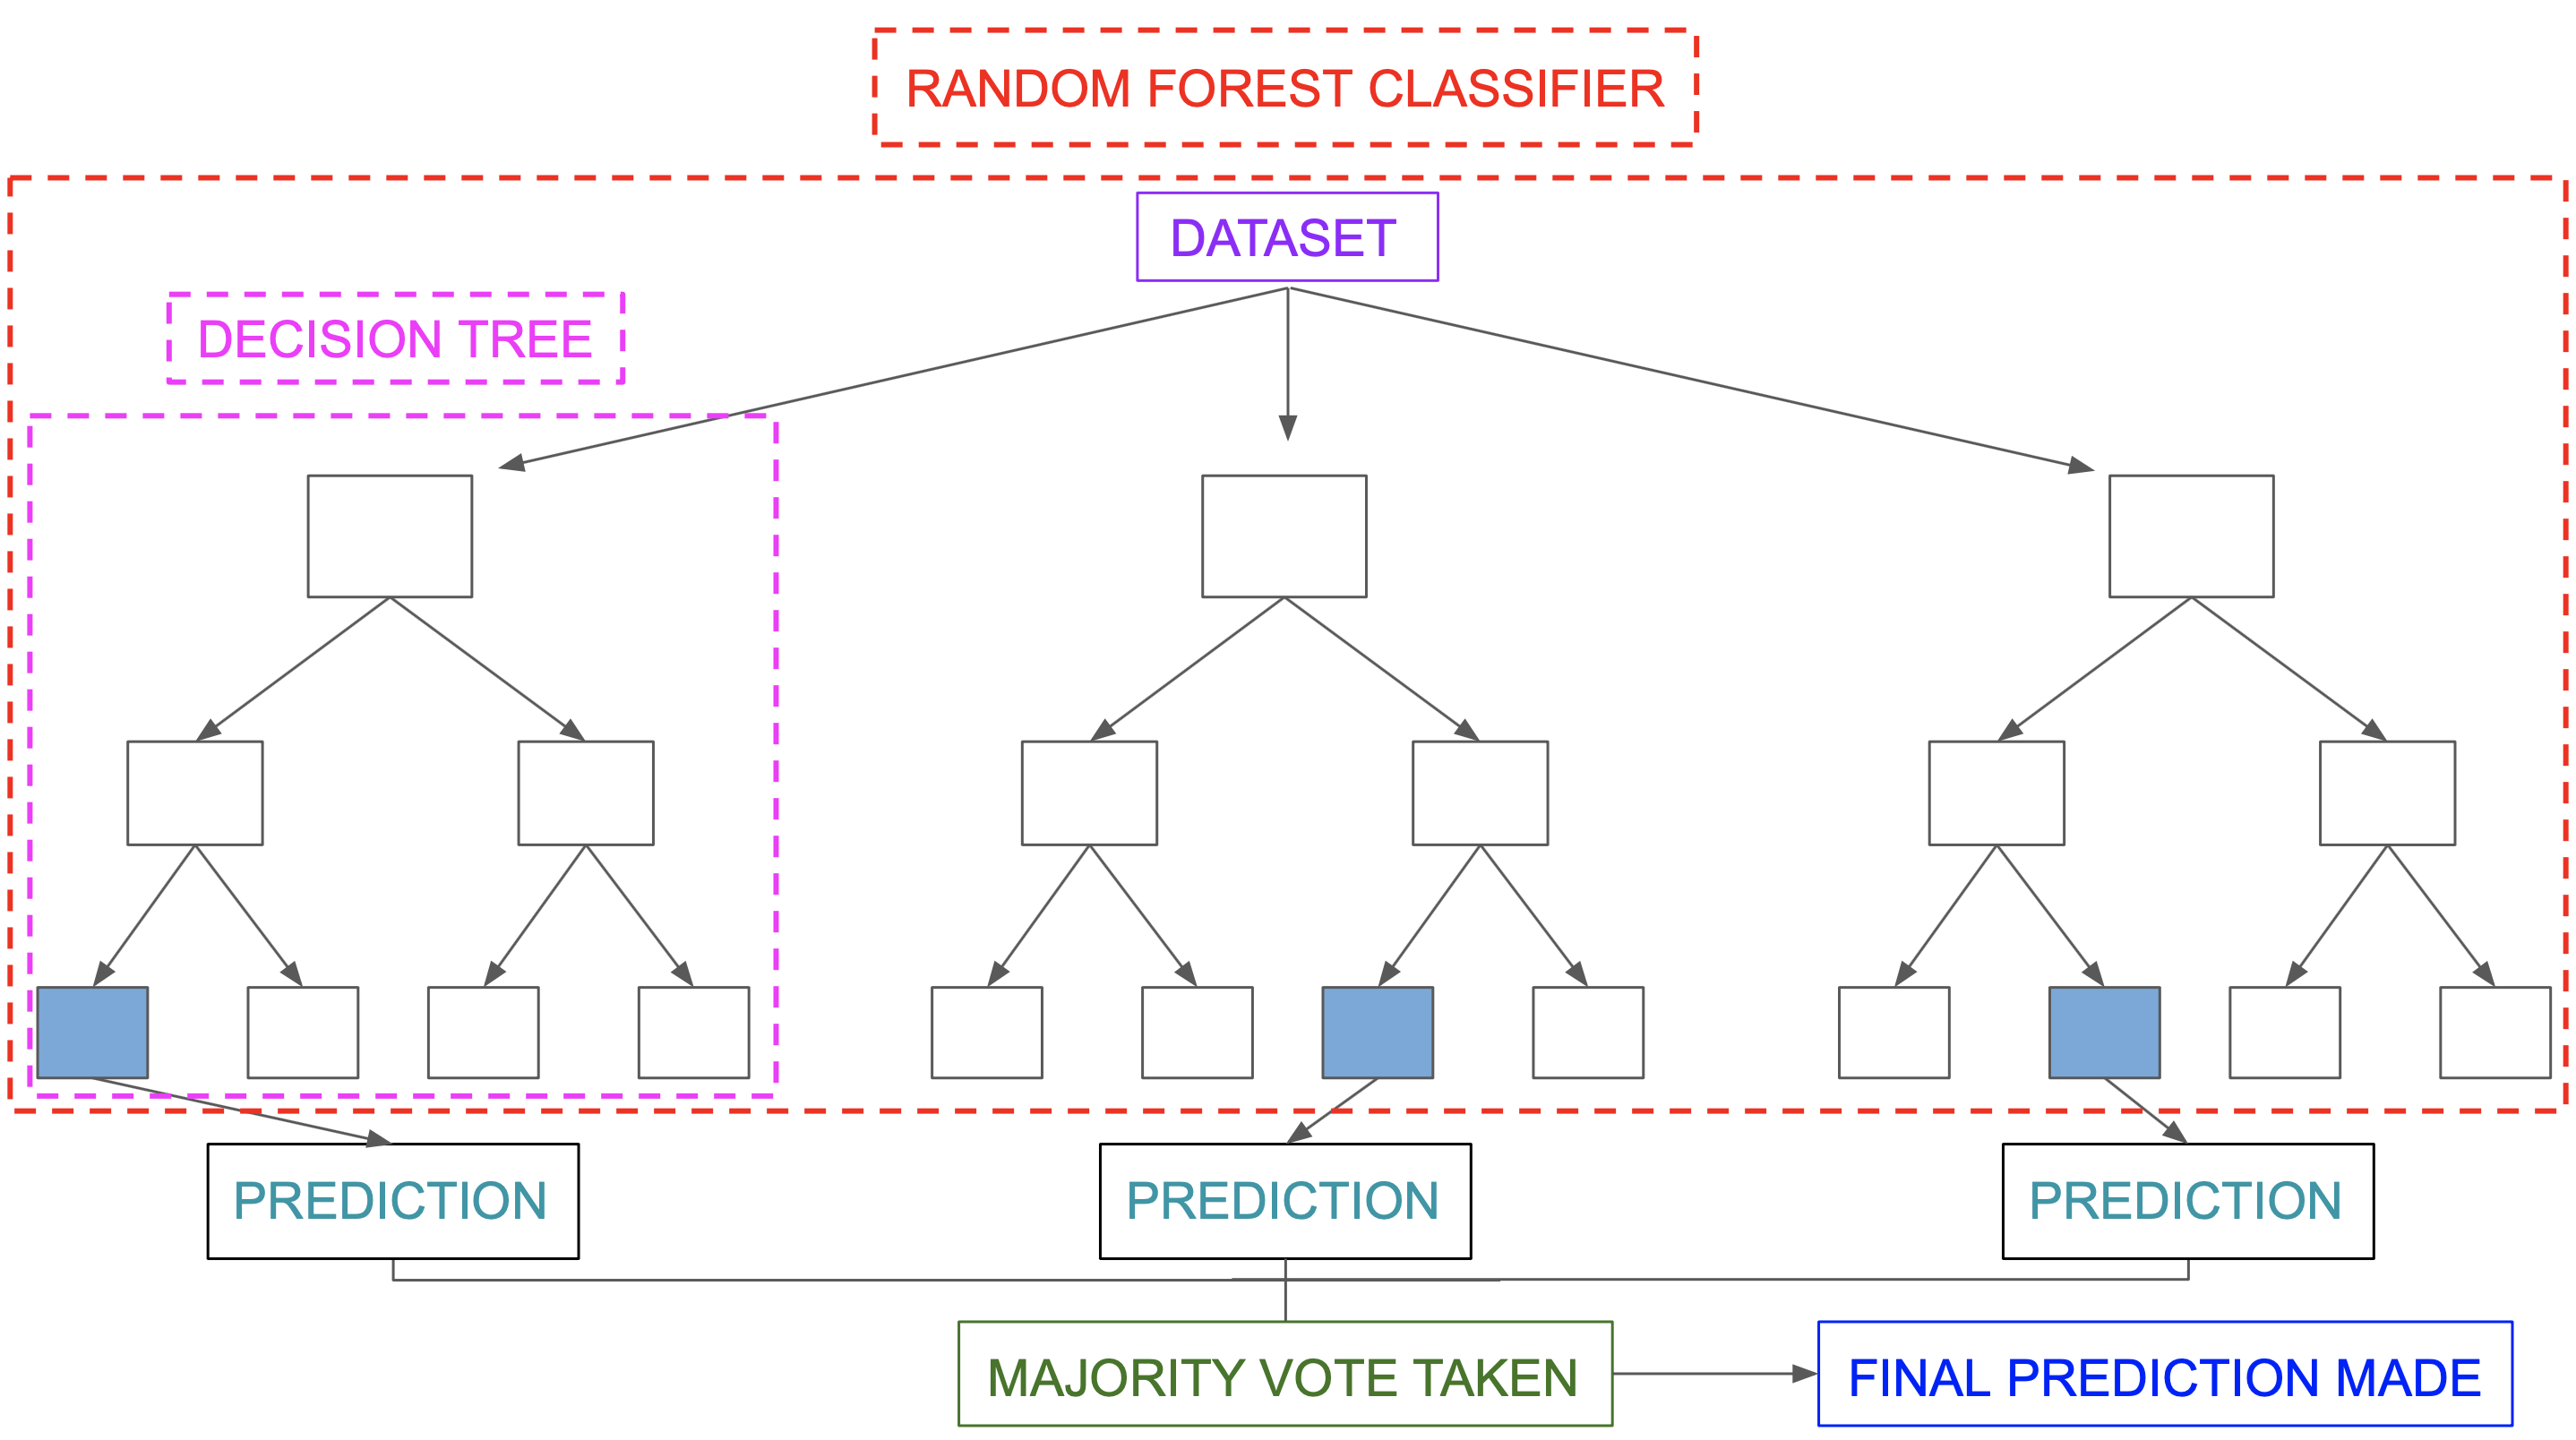

A random forest system is built on a variety of decision trees. Every decision tree is made up of nodes that represent decisions, leaf nodes, and a root node. The leaf node of each tree represents the decision tree’s final result. The final product is chosen using a majority-voting procedure. In this situation, the output picked by the majority of the decision trees becomes the random forest system’s ultimate output. Let us now implement the random forest algorithm.

### ML Model - 3

In [ ]:
#decision tree
import pandas as pd
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
humidity_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

In [ ]:
y_predicted = humidity_classifier.predict(X_test)

In [ ]:
y_predicted[:10]

In [ ]:
accuracy_score(y_test, y_predicted) * 100

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

In [ ]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)

In [ ]:

# Cross validation

grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)

In [ ]:
# Prediction

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)
     

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)
     

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Conclusion

From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.
half the devices have Bluetooth, and half don’t
there is a gradual increase in battery as the price range increases
Ram has continuous increase with price range while moving from Low cost to Very high cost
costly phones are lighter
RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
form all the above experiments we can conclude that logistic regression and, XGboosting with using hyperparameters we got the best results

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***